# GRIP : The Spark Foundation
# Data Science and Business Analytics Intern
# Task 6 : Prediction using Decision Tree Algorithm
# Author : Adil Anwar
# Batch : Feb,2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.drop(axis=1,columns=['Id'],inplace=True)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.describe(include='O')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [11]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df1=df.copy()

In [14]:
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
df1['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Graphical Analysis

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

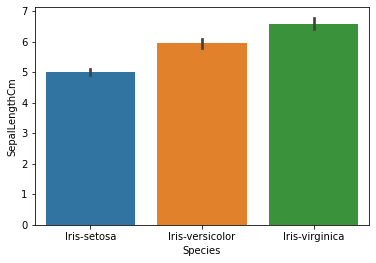

In [16]:
sns.barplot(x="Species",y="SepalLengthCm",data=df1)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

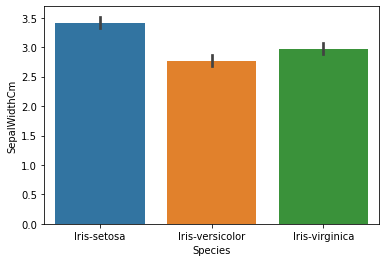

In [17]:
sns.barplot(x="Species",y="SepalWidthCm",data=df1)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

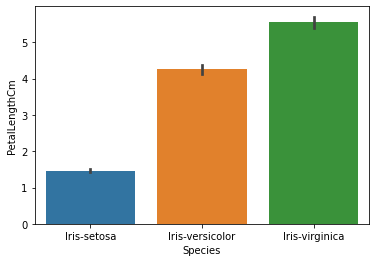

In [18]:
sns.barplot(x="Species",y="PetalLengthCm",data=df1)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

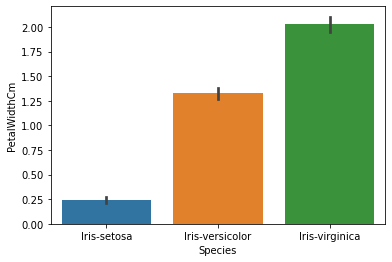

In [19]:
sns.barplot(x="Species",y="PetalWidthCm",data=df1)

C:\Users\adila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


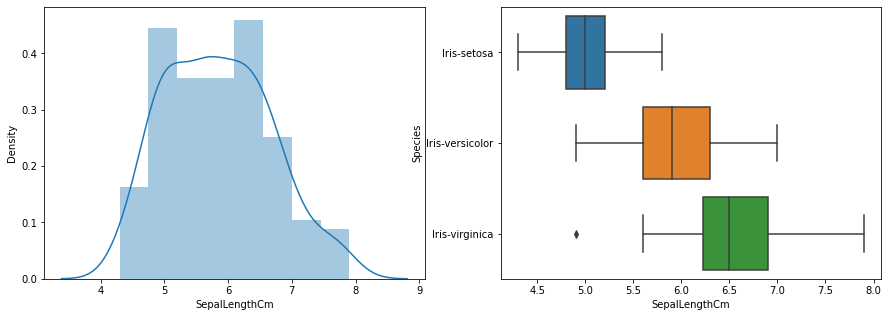

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(a=df1["SepalLengthCm"])
plt.subplot(1,2,2)
ax1=sns.boxplot(x=df1["SepalLengthCm"],y=df1['Species'])

C:\Users\adila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


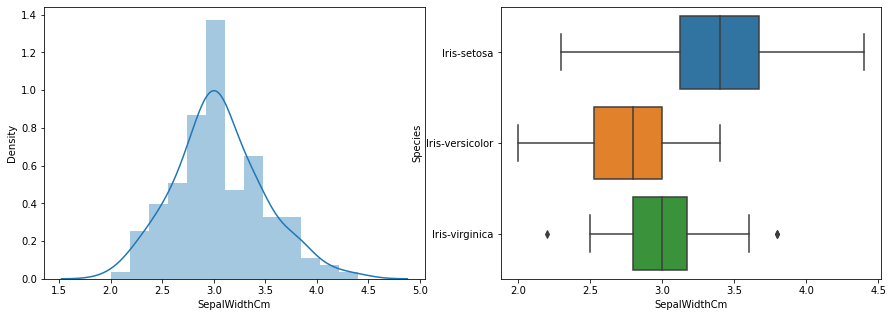

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(a=df1["SepalWidthCm"])
plt.subplot(1,2,2)
ax1=sns.boxplot(x=df1["SepalWidthCm"],y=df1['Species'])

C:\Users\adila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


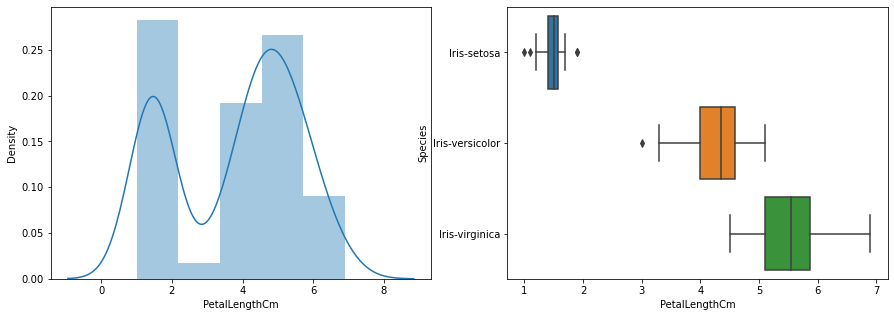

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(a=df1["PetalLengthCm"])
plt.subplot(1,2,2)
ax1=sns.boxplot(x=df1["PetalLengthCm"],y=df1['Species'])

C:\Users\adila\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


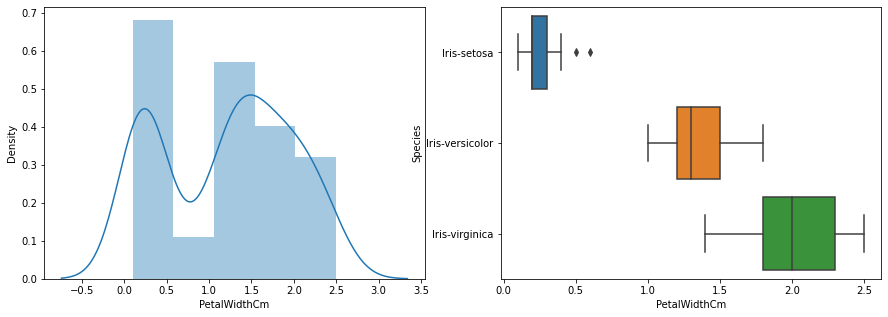

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(a=df1["PetalWidthCm"])
plt.subplot(1,2,2)
ax1=sns.boxplot(x=df1["PetalWidthCm"],y=df1['Species'])

<AxesSubplot:>

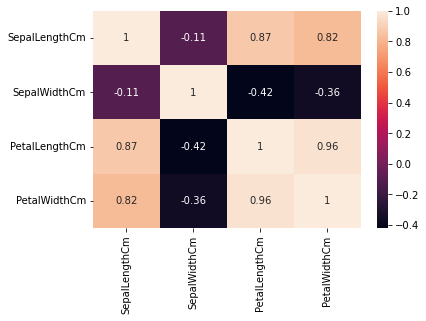

In [24]:
sns.heatmap(df.corr(),annot=True)

### There is huge positive correlation between PetalLength and Petal Width

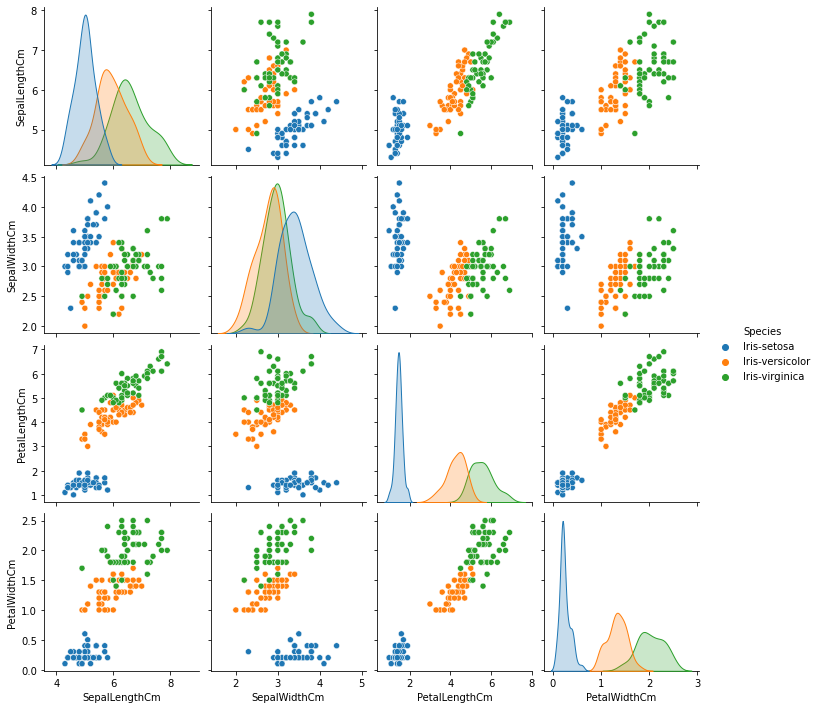

In [25]:
sns.pairplot(df1,hue="Species")

In [26]:
lb=LabelEncoder()

In [27]:
lb.fit_transform(df1['Species'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
y=lb.fit_transform(df1['Species'])

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### As there is huge positive correlation between Petal Length and Petal Width. So we are dropping one column to avoid overfitting.

In [30]:
X=df1.iloc[:,:3]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


### As we are using Decision Tree for Classification, We need not to standardize our data.

#### Train and Test Split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [32]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm
137,6.4,3.1,5.5
84,5.4,3.0,4.5
27,5.2,3.5,1.5
127,6.1,3.0,4.9
132,6.4,2.8,5.6
...,...,...,...
9,4.9,3.1,1.5
103,6.3,2.9,5.6
67,5.8,2.7,4.1
117,7.7,3.8,6.7


In [33]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm
114,5.8,2.8,5.1
62,6.0,2.2,4.0
33,5.5,4.2,1.4
107,7.3,2.9,6.3
7,5.0,3.4,1.5
100,6.3,3.3,6.0
40,5.0,3.5,1.3
86,6.7,3.1,4.7
76,6.8,2.8,4.8
71,6.1,2.8,4.0


In [34]:
y_train

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [35]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [36]:
dt=DecisionTreeClassifier()

In [37]:
model=dt.fit(x_train,y_train)

In [38]:
y_pred=model.predict(x_test)

### Metrics

In [39]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [40]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [41]:
acc_score=(11+13+5)/(11+13+1+5)
acc_score

0.9666666666666667

In [42]:
recall_score(y_test,y_pred,average='weighted')

0.9666666666666667

In [43]:
precision_score(y_test,y_pred,average='weighted')

0.9690476190476189

In [44]:
dt.score(x_train,y_train)

1.0

In [45]:
dt.score(x_test,y_test)

0.9666666666666667

### Hyperparameter Optimization

In [46]:
param_grid={'criterion' : ["gini", "entropy"], 'max_depth': [6,10,17,18,19,20,21,22,23,24,30],
           'min_samples_split': range(2,14),'min_samples_leaf': [1,2,3,4,5,6,7],
           'max_features' : ["auto", "sqrt", "log2"]}

In [47]:
grid=GridSearchCV(dt,param_grid=param_grid,cv=5)

In [53]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 10, 17, 18, 19, 20, 21, 22, 23, 24,
                                       30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': range(2, 14)})

In [54]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [55]:
pred=grid.predict(x_test)

In [56]:
grid.score(x_train,y_train)

0.9583333333333334

In [57]:
grid.score(x_test,y_test)

0.9333333333333333

#### The Decision Tree Calssifier model is good.

In [58]:
dt.score(x_train,y_train)

1.0

In [59]:
dt.score(x_test,y_test)

0.9666666666666667

### Prediction

In [61]:
def prediction(SepalLengthCm,SepalWidthCm,PetalLengthCm):
    pred=dt.predict(pd.DataFrame(data=[[SepalLengthCm,SepalWidthCm,PetalLengthCm]],columns=[['SepalLengthCm','SepalWidthCm','PetalLengthCm']]))
    if pred == 0:
        print('The Species of Flower is: Iris-setosa')
    elif pred == 1:
        print('The Species of Flower is: Iris-versicolor')
    else:
        print('The Species of Flower is: Iris-virginica')

In [62]:
prediction(6.0,3.1,5.0)

The Species of Flower is: Iris-virginica


### Visualizing the Decision Tree

In [67]:
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

DecisionTreeClassifier()

In [68]:
# Import necessary libraries for graph viz
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

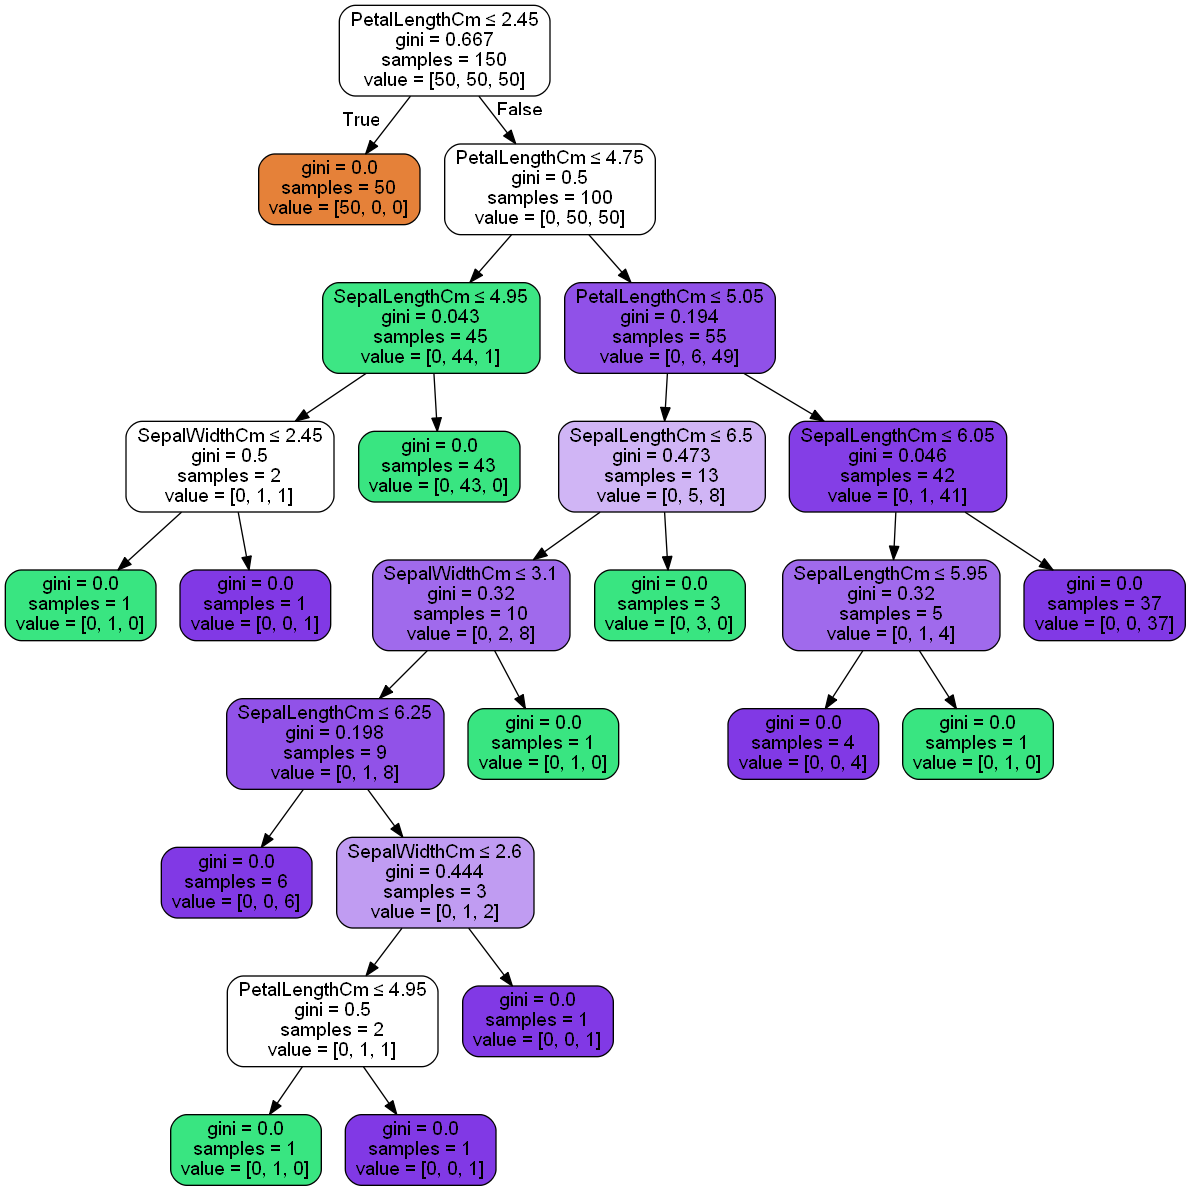

In [69]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())